<a href="https://colab.research.google.com/github/heyggun/ML/blob/main/11.%20%EB%B6%88%EA%B7%A0%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B(SMOTE%2C%20ADASYN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import imblearn
print(imblearn.__version__)

0.8.1


In [3]:
import pandas as pd
import numpy as np

from collections import Counter
from matplotlib import pyplot

In [12]:
DataURL = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
df = pd.read_csv(DataURL, header=None)
df.columns = ['RI', 'Na', 'Mg', 'Al', 'Sl', 'K', 'Ca', 'Ba', 'Fe', 'y']
display(df.head(3))

,RI,Na,Mg,Al,Sl,K,Ca,Ba,Fe,y
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [13]:
df['y'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: y, dtype: int64

- Class 1 : 빌딩 창문(float processed)
- Class 2 : 빌딩 창문(non-float preocessed)
- Class 3 : 자동차 창문(float preocessed)
- Class 4 : 자동차 창문(non-float processed)
- Class 5 : 컨테이너
- Class 6 : 식기류
- Class 7 : 헤드램프

In [36]:
y = df['y']
X = df.drop(columns=['y'])

In [37]:
display(y.head(3))
display(X.head(3))

0    1
1    1
2    1
Name: y, dtype: int64

,RI,Na,Mg,Al,Sl,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0


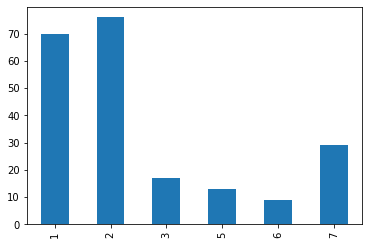

In [22]:
df['y'].value_counts().sort_index().plot(kind='bar');

In [43]:
counter = Counter(y)
for k,v in counter.items():
  print(f"Class={k}, n={v}, {round(v/len(y)*100,2)}%")


Class=1, n=70, 32.71%
Class=2, n=76, 35.51%
Class=3, n=17, 7.94%
Class=5, n=13, 6.07%
Class=6, n=9, 4.21%
Class=7, n=29, 13.55%


In [71]:
from sklearn.model_selection import train_test_split

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X,y, test_size=0.3,
                                                           random_state=0)

print(X_train_m.shape)
print(X_test_m.shape)
print(y_train_m.shape)
print(y_test_m.shape)

(149, 9)
(65, 9)
(149,)
(65,)


In [82]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_m, y_train_m)
pred = model.predict_proba(X_test_m)

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test_m, pred, multi_class='ovr'))

0.9393671830674483


- 불균형 데이터 처리
: Under Sampling 이나 단순 Over Sampling을 권장하지 않는 방법

### Under sampling - 언더 샘플링

In [88]:
from imblearn.under_sampling import RandomUnderSampler

x_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X,y)

counter = Counter(y_resampled)
for k,v in counter.items():
  print(f"Class ={k}, n={v}, {round(v/len(y_resampled)*100,2)}%")

Class =1, n=9, 16.67%
Class =2, n=9, 16.67%
Class =3, n=9, 16.67%
Class =5, n=9, 16.67%
Class =6, n=9, 16.67%
Class =7, n=9, 16.67%


-> Undersampling은 잠재적으로 정보의 가치가 높은 데이터도 버려서 유용한 데이터가 사라지는 위험이 있음...

In [89]:
from sklearn.model_selection import train_test_split

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(x_resampled, y_resampled, 
                                                            test_size=0.3,
                                                           random_state=0)

print(X_train_m.shape)
print(X_test_m.shape)
print(y_train_m.shape)
print(y_test_m.shape)


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_m, y_train_m)
pred = model.predict_proba(X_test_m)

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test_m, pred, multi_class='ovr'))

(37, 9)
(17, 9)
(37,)
(17,)
0.8992063492063492


### Over Sampling - 오버 샘플링

In [90]:
from imblearn.over_sampling import RandomOverSampler

x_resampled, y_resampled = RandomOverSampler(random_state=0).fit_resample(X,y)

counter = Counter(y_resampled)

for i,v in counter.items():
  print(f"Class = {i}, n={v}, {round(v/len(y_resampled)*100,2)}%")


Class = 1, n=76, 16.67%
Class = 2, n=76, 16.67%
Class = 3, n=76, 16.67%
Class = 5, n=76, 16.67%
Class = 6, n=76, 16.67%
Class = 7, n=76, 16.67%


-> 모든 클래스의 데이터가 76개로 통일되었으나, 동일 데이터를 똑같이 복사해서 수만 늘리는 것으로 오버 피팅의 위험이 생김

In [91]:
from sklearn.model_selection import train_test_split

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(x_resampled, y_resampled, 
                                                            test_size=0.3,
                                                           random_state=0)

print(X_train_m.shape)
print(X_test_m.shape)
print(y_train_m.shape)
print(y_test_m.shape)


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_m, y_train_m)
pred = model.predict_proba(X_test_m)

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test_m, pred, multi_class='ovr'))

(319, 9)
(137, 9)
(319,)
(137,)
0.9865663812798798


### Algorithm Over Sampling (알고리즘을 통한 오버샘플링)

- SMOTE, ADASYN

#### SMOTE

1. 먼저 소수 클래스에서 각각의 샘플들의 knn(k-nearest neighbors) 찾음
2. 그 이웃들 사이에 선을 그어 무작위 점 생성

In [92]:
from imblearn.over_sampling import SMOTE

x_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X,y)

counter = Counter(y_resampled)

for i,v in counter.items():
  print(f"Class={i}, n={v}, {round(v/len(y_resampled)*100,2)}%")

Class=1, n=76, 16.67%
Class=2, n=76, 16.67%
Class=3, n=76, 16.67%
Class=5, n=76, 16.67%
Class=6, n=76, 16.67%
Class=7, n=76, 16.67%


-> 완전히 동일하지는 않지만 샘플들 사이의 특성을 반영한 데이터 생성되어 오버 피팅에 나름대로 강한 데이터 생성됨 (없지는 않음)

In [93]:
from sklearn.model_selection import train_test_split

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(x_resampled, y_resampled, 
                                                            test_size=0.3,
                                                           random_state=0)

print(X_train_m.shape)
print(X_test_m.shape)
print(y_train_m.shape)
print(y_test_m.shape)


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_m, y_train_m)
pred = model.predict_proba(X_test_m)

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test_m, pred, multi_class='ovr'))

(319, 9)
(137, 9)
(319,)
(137,)
0.9780510739225461


#### ADASYN

- SMOTE의 개선된 버전, 동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성됨.
- 모든 표본이 약간 분산됨

In [96]:
from imblearn.over_sampling import ADASYN

x_resampled, y_resampled = ADASYN(sampling_strategy = 'minority').fit_resample(X,y)

counter = Counter(y_resampled)

for i,v in counter.items():
  print(f"Class={i}, n={v}, {round(v/len(y_resampled)*100,2)}%")

Class=1, n=70, 24.73%
Class=2, n=76, 26.86%
Class=3, n=17, 6.01%
Class=5, n=13, 4.59%
Class=6, n=78, 27.56%
Class=7, n=29, 10.25%


In [97]:
from sklearn.model_selection import train_test_split

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(x_resampled, y_resampled, 
                                                            test_size=0.3,
                                                           random_state=0)

print(X_train_m.shape)
print(X_test_m.shape)
print(y_train_m.shape)
print(y_test_m.shape)


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_m, y_train_m)
pred = model.predict_proba(X_test_m)

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test_m, pred, multi_class='ovr'))

(198, 9)
(85, 9)
(198,)
(85,)
0.9460225301741406


### Cost-sensitive learning
- 데이터 자체를 생성하지는 않지만, 머신러닝을 학습할 때 소수의 클래스에 대한 cost 값에 가중치를 더 많이 주어 균형 잡힌 학습을 가능하게 하는 방법

In [99]:
from numpy import mean, std
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


def evaluate_model(X_, y_, model_):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model_, X_, y_, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

model = RandomForestClassifier(n_estimators=1000)
scores = evaluate_model(X, y, model)
print('Mean Accuracy No weight: %.3f (%.3f)' % (mean(scores), std(scores)))

weights = {1:1.0, 2:1.0, 3:2.0, 5:2.0, 6:2.0, 7:2.0}
model = RandomForestClassifier(n_estimators=1000, class_weight=weights)
scores = evaluate_model(X, y, model)
print('Mean Accuracy    weight: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy No weight: 0.799 (0.056)
Mean Accuracy    weight: 0.807 (0.051)
